In [1]:
#First part simulates a near orbit star for Sag A together with some simple plots and tracings (no animation yet)
#Second part simulates N stars rotating around Sag A for much larger distances

%matplotlib inline
import numpy
from matplotlib import pyplot
from amuse.units import nbody_system
from amuse.units import units
from amuse.ext.orbital_elements import rel_posvel_arrays_from_orbital_elements
from amuse.lab import Particles, units
from amuse.lab import nbody_system

In [2]:
# M1, M2, a , e ,true anom, incl, long of asc, arg of perip, G
rel_posvel_arrays_from_orbital_elements(8.254765e36 | units.kg ,0 |units.kg, 1.46605913e14 | units.m, 0.88466, 0, 2.3355647 , 3.9767327, 1.15418623, 6.67430e-11 | units.m**3 * units.kg**-1 * units.s**-2)

(quantity<[[-1.25294358764e+13, 2.11160002775e+12, 1.11573496706e+13]] m>,
 quantity<[[3181141.23078, 6786120.97299, 2288028.30274]] m * s**-1>)

In [3]:
x = [] | units.AU
y = [] | units.AU

def Sag_and_stars():
    particles = Particles(2)
    Sag = particles[0]
    Sag.mass = 4.15e6 | units.MSun
    Sag.radius = 12.5e6 | units.km   #Schw Radius
    Sag.position = (0,0, 0) | units.AU
    Sag.velocity = (0, 0, 0) | (units.m/units.s)

    S2 = particles[1]
    S2.mass = 5 | units.MSun #I did not find the correct mass but this should be negligent for the orbit
    S2.radius = 1.5 | units.RSun    #Neither is there any data on it's radius
    S2.position = (-83.75410587,  14.11517438,  74.58227607) | units.AU
    S2.velocity = [3181141.23078, 6786120.97299, 2288028.30274] | units.ms

    
    return particles
print(Sag_and_stars())

                 key         mass       radius           vx           vy           vz            x            y            z
                   -         MSun           km        m / s        m / s        m / s           AU           AU           AU
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
  557027622904085751    4.150e+06    1.250e+07    0.000e+00    0.000e+00    0.000e+00    0.000e+00    0.000e+00    0.000e+00
10681996387936688820    5.000e+00    1.043e+06    3.181e+06    6.786e+06    2.288e+06   -8.375e+01    1.412e+01    7.458e+01
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========


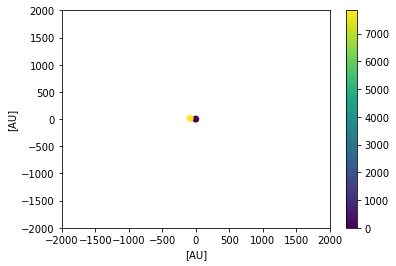

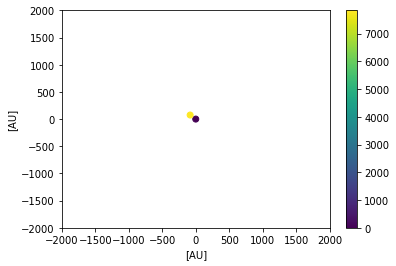

In [4]:
System = Sag_and_stars()
from amuse.plot import scatter
def xyplot_snapshot(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    scatter(bodies.x, bodies.y, c=v.value_in(units.kms), alpha=1)
    pyplot.colorbar()
    pyplot.xlim(-2000,2000)
    pyplot.ylim(-2000, 2000)
    pyplot.show()
    
def xzplot_snapshot(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    scatter(bodies.x, bodies.z, c=v.value_in(units.kms), alpha=1)
    pyplot.colorbar()
    pyplot.xlim(-2000,2000)
    pyplot.ylim(-2000, 2000)
    pyplot.show()    
xyplot_snapshot(System)
xzplot_snapshot(System)   #Find a better way to show 3d-ness of system

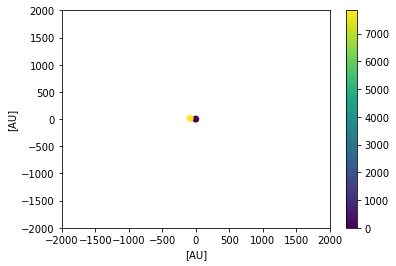

cluster at Time= 0.0 yr Mass= 4150005.0 MSun Rvir= 227.420721383 parsec


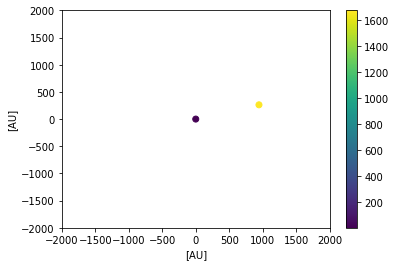

cluster at Time= 2.0 yr Mass= 4150005.0 MSun Rvir= 2256.96781645 parsec


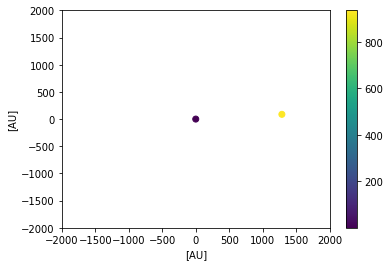

cluster at Time= 4.0 yr Mass= 4150005.0 MSun Rvir= 3201.9601757 parsec


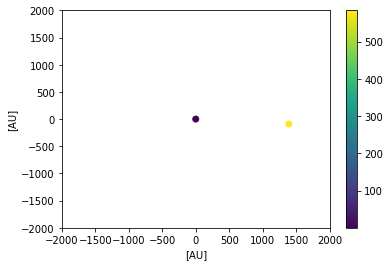

cluster at Time= 6.0 yr Mass= 4150005.0 MSun Rvir= 3620.36430418 parsec


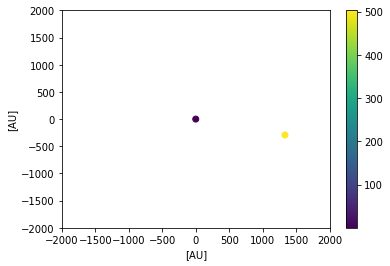

cluster at Time= 8.0 yr Mass= 4150005.0 MSun Rvir= 3700.24073449 parsec


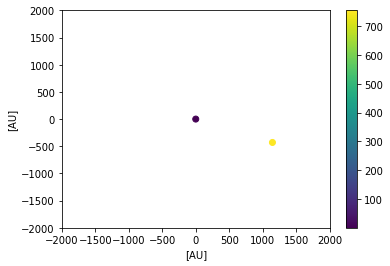

cluster at Time= 10.0 yr Mass= 4150005.0 MSun Rvir= 3428.34743859 parsec


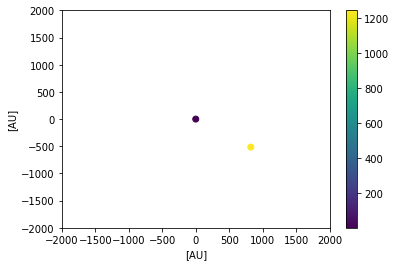

cluster at Time= 12.0 yr Mass= 4150005.0 MSun Rvir= 2797.7236957 parsec


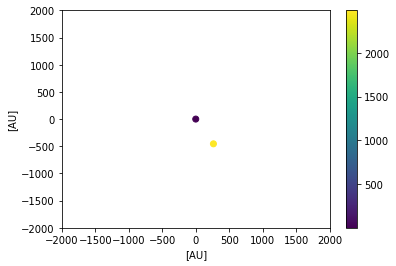

cluster at Time= 14.0 yr Mass= 4150005.0 MSun Rvir= 1491.82269459 parsec


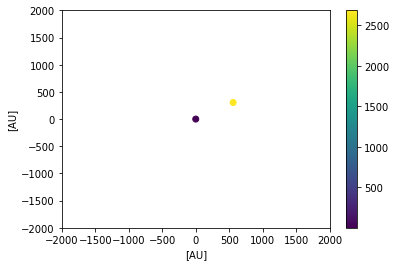

cluster at Time= 16.0 yr Mass= 4150005.0 MSun Rvir= 1353.59005601 parsec


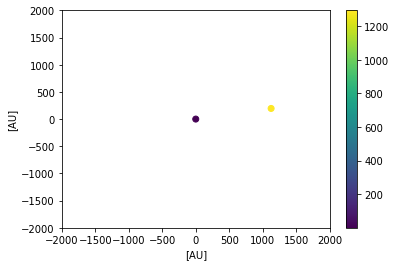

cluster at Time= 18.0 yr Mass= 4150005.0 MSun Rvir= 2730.82092916 parsec


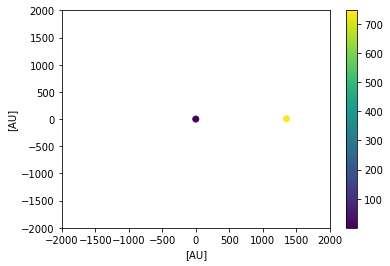

cluster at Time= 20.0 yr Mass= 4150005.0 MSun Rvir= 3438.32809297 parsec


In [5]:
from amuse.community.ph4.interface import ph4
from amuse.ext.LagrangianRadii import LagrangianRadii
converter = nbody_system.nbody_to_si(System.mass.sum(), System[1].position.length())
gravity = ph4(converter)
gravity.particles.add_particles(System)
channel = gravity.particles.new_channel_to(System)


times = numpy.arange(0, 100, 0.1) | units.yr
RL25 = [] | units.AU
Rvir = [] | units.AU
for time in times:
    gravity.evolve_model(time)
    channel.copy()
    Rvir.append(System.virial_radius())
    L = LagrangianRadii(System)
    RL25.append(LagrangianRadii(System)[5])
    x.append(System[1].x)
    y.append(System[1].y)
    if not time.value_in(units.yr)%2.0:
        xyplot_snapshot(System)
        
        print("cluster at Time=", time.in_(units.yr), 
              "Mass=", System.mass.sum().in_(units.MSun),
              "Rvir=", Rvir[-1].in_(units.parsec))

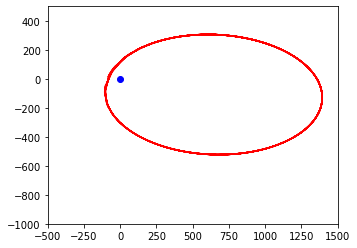

In [6]:
from amuse.plot import plot
plot(x, y, 'r-')
plot(0,0, 'bo')
pyplot.xlim(-500,1500)
pyplot.ylim(-1000, 500)
pyplot.gca().set_aspect("equal", adjustable="box")
pyplot.show()

                 key         mass       radius           vx           vy           vz            x            y            z
                   -         MSun           km        m / s        m / s        m / s            m            m            m
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 5022540535150949533    4.150e+06    1.250e+07    0.000e+00    0.000e+00    0.000e+00    1.000e-07    0.000e+00    0.000e+00
 3511755591564671379    5.000e+00    1.043e+06   -2.396e+04    2.287e+05    0.000e+00   -2.714e+20   -2.843e+19    0.000e+00
 2471915470846715045    5.000e+00    1.043e+06    1.388e+05    1.834e+05    0.000e+00   -2.033e+20    1.539e+20    0.000e+00
17512905700547010309    5.000e+00    1.043e+06    2.132e+05    8.639e+04    0.000e+00   -1.023e+20    2.523e+20    0.000e+00
17073195100903455849    5.000e+00    1.043e+06   -1.686e+05    1.565e+05    0.000e+00   -1.693e+20   -1.824e+20    0.000e+00


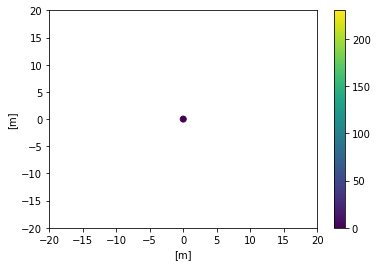

In [37]:
import random,math
N=50
radius = 8.27806 
radius_var = 0.10  #10% change in radius
vel = 230000 
def Sag_and_Nstars():  #I kinda messed up, I shouldn't include Sag so we can remove that part and rename
    particles = Particles(N+1)
    Sag = particles[0]
    Sag.mass = 4.15e6 | units.MSun
    Sag.radius = 12.5e6 | units.km   #Schw Radius
    Sag.position = (0.0000001,0, 0) | units.m #code can't run if particle in origin,
    Sag.velocity = (0, 0, 0) | (units.m/units.s)
    i=0
    while i < N:
        #here we generate our N bodies, we can change code in here to reflect different things
        #We can distribut them randomly, have them near eachother, all at the same radius etc.
        #All particles in x-y plane, this should still be adjusted accordingly
        
        #For now I will keep the mass and radius the same and simulate stars at our radius +- a bit
        angle = random.random()*2*math.pi
        particles[i+1].mass = 5 | units.MSun 
        particles[i+1].radius = 1.5 | units.RSun   
        adjusted_rad = radius*(1 + radius_var*(2*(random.random()-0.5)))  #this gives a random radius between 1-radius_var and 1+radius_var times the radius
        particles[i+1].position = (adjusted_rad*math.cos(angle),adjusted_rad*math.sin(angle) , 0 ) | units.kpc
        particles[i+1].velocity = [math.sin(angle)*vel,-math.cos(angle)*vel,0] | (units.m/units.s)
        
        i += 1
    
    
    return particles

System2 = Sag_and_Nstars()
print(System2)
def xyplot_snapshot2(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    scatter(bodies.x, bodies.y, c=v.value_in(units.kms), alpha=1)
    pyplot.colorbar()
    pyplot.xlim(-20,20)
    pyplot.ylim(-20, 20)
    pyplot.show()
xyplot_snapshot2(System2)



converter=nbody_system.nbody_to_si(System2.mass.sum(), 
                                   System2.position.length())

In [38]:
from amuse.units import units, constants
class MilkyWay_galaxy(object):
    def __init__(self, 
                 Mb=1.40592e10| units.MSun,
                 Md=8.5608e10| units.MSun,
                 Mh=1.07068e11 | units.MSun):
        self.Mb= Mb
        self.Md= Md
        self.Mh= Mh

    def get_potential_at_point(self,eps,x,y,z):
        r=(x**2+y**2+z**2)**0.5
        R= (x**2+y**2)**0.5
        # buldge
        b1= 0.3873 |units.kpc
        pot_bulge= -constants.G*self.Mb/(r**2+b1**2)**0.5 
        # disk
        a2= 5.31 |units.kpc
        b2= 0.25 |units.kpc
        pot_disk = -constants.G*self.Md/(R**2 + (a2+ (z**2+ b2**2)**0.5 )**2 )**0.5
        #halo
        a3= 12.0 |units.kpc
        cut_off=100 |units.kpc
        d1= r/a3
        c=1+ (cut_off/a3)**1.02
        pot_halo= -constants.G*(self.Mh/a3)*d1**1.02/(1+ d1**1.02) \
                  - (constants.G*self.Mh/(1.02*a3))\
                      * (-1.02/c +numpy.log(c) + 1.02/(1+d1**1.02) \
                           - numpy.log(1.0 +d1**1.02) )
        return 2*(pot_bulge+pot_disk+ pot_halo) 
                # multiply by 2 because it is a rigid potential
    
    def get_gravity_at_point(self, eps, x,y,z): 
        r= (x**2+y**2+z**2)**0.5
        R= (x**2+y**2)**0.5
        #bulge
        b1= 0.3873 |units.kpc
        force_bulge= -constants.G*self.Mb/(r**2+b1**2)**1.5 
        #disk
        a2= 5.31 |units.kpc
        b2= 0.25 |units.kpc
        d= a2+ (z**2+ b2**2)**0.5
        force_disk=-constants.G*self.Md/(R**2+ d**2 )**1.5
        #halo
        a3= 12.0 |units.kpc
        d1= r/a3
        force_halo= -constants.G*self.Mh*d1**0.02/(a3**2*(1+d1**1.02))
       
        ax= force_bulge*x + force_disk*x  + force_halo*x/r
        ay= force_bulge*y + force_disk*y  + force_halo*y/r
        az= force_bulge*z + force_disk*d*z/(z**2 + b2**2)**0.5 + force_halo*z/r 

        return ax,ay,az
MWG = MilkyWay_galaxy()

In [39]:
from amuse.couple import bridge
from amuse.community.hermite.interface import Hermite
converter=nbody_system.nbody_to_si(System2.mass.sum(), 
                                   System2.position.length())

gravity_code = Hermite(converter)
gravity_code.particles.add_particles(System2)
ch_g2l = gravity_code.particles.new_channel_to(System2)


In [40]:
gravity = bridge.Bridge(use_threading=False)
gravity.add_system(gravity_code, (MWG,) )
gravity.timestep = 1|units.Myr

times = numpy.arange(0., 500, 1) | units.Myr
x = [] | units.kpc
y = [] | units.kpc
for time in times:
    gravity.evolve_model(time)
    ch_g2l.copy()
    x.append(System2.x)
    y.append(System2.y)
gravity.stop()

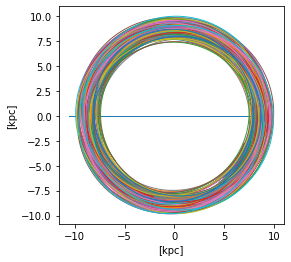

In [93]:

plot(x, y, lw=1)
pyplot.gca().set_aspect("equal", adjustable="box")
pyplot.show()


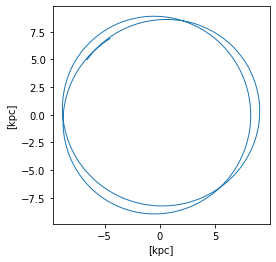

In [92]:
x2 = []| units.kpc  #We can use following code to get orbit of a specific particle
y2 = [] | units.kpc
for j in range(len(times)):
    x2.append(x[j][2])
    y2.append(y[j][2])
plot(x2, y2, lw=1)
pyplot.gca().set_aspect("equal", adjustable="box")
pyplot.show()
